In [31]:
from joblib import dump
dump(model, "energy_model.pkl")

['energy_model.pkl']

Model Evaluation: MAE = 0.350, RMSE = 0.499


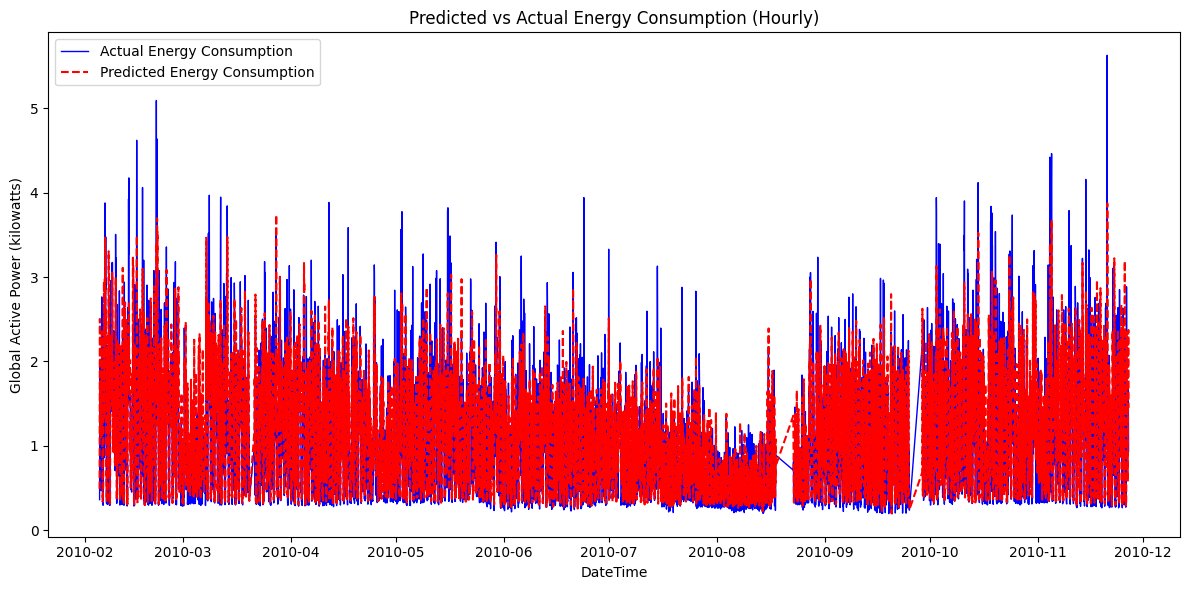

In [35]:
from joblib import load
# -------------------------------
# Step 1. Load the saved model
# -------------------------------
# Instead of retraining, load the saved model from energy_model.pkl
model = load("energy_model.pkl")

# -------------------------------
# Step 2. Evaluate the Model on the Test Set
# -------------------------------
# Assumes that you already have 'test', 'features', and 'target' defined.
predictions = model.predict(test[features])
mae = mean_absolute_error(test[target], predictions)
rmse = np.sqrt(mean_squared_error(test[target], predictions))
print(f"Model Evaluation: MAE = {mae:.3f}, RMSE = {rmse:.3f}")

# Plot actual vs. predicted energy consumption
plt.figure(figsize=(12, 6))
plt.plot(test.index, test[target], label="Actual Energy Consumption", color="blue", linewidth=1)
plt.plot(test.index, predictions, label="Predicted Energy Consumption", color="red", linestyle="--", linewidth=1.5)
plt.xlabel("DateTime")
plt.ylabel("Global Active Power (kilowatts)")
plt.title("Predicted vs Actual Energy Consumption (Hourly)")
plt.legend()
plt.tight_layout()
plt.show()

# -------------------------------
# Step 3. Create a GUI for User Input
# -------------------------------
def predict_consumption():
    """
    Read input values from the GUI, create a DataFrame,
    predict energy consumption using the loaded model,
    and display the prediction in the GUI.
    """
    try:
        hour_val = int(entry_hour.get())
        day_val = int(entry_day.get())
        month_val = int(entry_month.get())
        day_of_week_val = int(entry_day_of_week.get())
        lag1_val = float(entry_lag1.get())
        lag2_val = float(entry_lag2.get())
        
        # Validate the inputs (basic validation)
        if not (0 <= hour_val <= 23):
            raise ValueError("Hour must be between 0 and 23")
        if not (1 <= day_val <= 31):
            raise ValueError("Day must be between 1 and 31")
        if not (1 <= month_val <= 12):
            raise ValueError("Month must be between 1 and 12")
        if not (0 <= day_of_week_val <= 6):
            raise ValueError("Day of week must be between 0 (Monday) and 6 (Sunday)")
    
    except ValueError as e:
        messagebox.showerror("Input Error", f"Invalid input: {e}")
        return
    
    # Create a DataFrame from the input values; note the model expects these columns.
    user_data = pd.DataFrame({
        "hour": [hour_val],
        "day": [day_val],
        "month": [month_val],
        "day_of_week": [day_of_week_val],
        "lag1": [lag1_val],
        "lag2": [lag2_val]
    })
    
    # Use the loaded model to predict energy consumption.
    prediction = model.predict(user_data)
    result_label.config(text=f"Predicted Global Active Power:\n{prediction[0]:.3f} kilowatts")

# Build the GUI using Tkinter.
root = tk.Tk()
root.title("Energy Consumption Predictor")
root.geometry("400x350")

label_info = tk.Label(root, text="Enter details for prediction:", font=("Helvetica", 12))
label_info.pack(pady=10)

frame = tk.Frame(root)
frame.pack(pady=5)

# Define input fields for each required feature.

# Hour input
tk.Label(frame, text="Hour (0-23):").grid(row=0, column=0, sticky="e", padx=5, pady=5)
entry_hour = tk.Entry(frame, width=10)
entry_hour.grid(row=0, column=1, padx=5, pady=5)

# Day input
tk.Label(frame, text="Day (1-31):").grid(row=1, column=0, sticky="e", padx=5, pady=5)
entry_day = tk.Entry(frame, width=10)
entry_day.grid(row=1, column=1, padx=5, pady=5)

# Month input
tk.Label(frame, text="Month (1-12):").grid(row=2, column=0, sticky="e", padx=5, pady=5)
entry_month = tk.Entry(frame, width=10)
entry_month.grid(row=2, column=1, padx=5, pady=5)

# Day of Week input
tk.Label(frame, text="Day of Week (0=Mon, 6=Sun):").grid(row=3, column=0, sticky="e", padx=5, pady=5)
entry_day_of_week = tk.Entry(frame, width=10)
entry_day_of_week.grid(row=3, column=1, padx=5, pady=5)

# Lag1 input
tk.Label(frame, text="Lag1 (previous hour's power):").grid(row=4, column=0, sticky="e", padx=5, pady=5)
entry_lag1 = tk.Entry(frame, width=10)
entry_lag1.grid(row=4, column=1, padx=5, pady=5)

# Lag2 input
tk.Label(frame, text="Lag2 (two hours ago power):").grid(row=5, column=0, sticky="e", padx=5, pady=5)
entry_lag2 = tk.Entry(frame, width=10)
entry_lag2.grid(row=5, column=1, padx=5, pady=5)

# Create the "Predict" button
predict_btn = tk.Button(root, text="Predict Energy Consumption", command=predict_consumption, bg="lightblue")
predict_btn.pack(pady=20)

# Label to display the prediction result
result_label = tk.Label(root, text="", font=("Helvetica", 12, "bold"))
result_label.pack(pady=10)

# Run the GUI event loop
root.mainloop()
